In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import cv2
import numpy as np
import pandas as pd

data=[]
basepath='/content/drive/MyDrive/collab  notebook/img_dataset'
for folder in os.scandir(basepath):
    if folder.is_dir():
        #print(folder.name)
        for file in os.scandir(folder.path):
            im=cv2.imread(file.path)
            im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
            features=np.mean(im, axis=(0, 1)).tolist()
            features.append(folder.name)
            data.append(features)
            #print(features)

In [5]:
print(data)

[[191.58952649111674, 189.288963356599, 163.06587087563452, 'melon'], [166.03120987654322, 170.96171851851852, 143.6199901234568, 'melon'], [216.19443616492796, 224.07205166418282, 198.71262791852956, 'melon'], [183.6846496634114, 166.2378011651549, 158.60121150827513, 'melon'], [183.69758646481884, 166.24619744424427, 158.61590341645334, 'melon'], [196.76813440860215, 141.60847849462365, 129.94942204301074, 'melon'], [197.1388400636981, 180.72692446367407, 164.11924238327023, 'melon'], [196.4696317204301, 141.29879569892472, 129.61652688172043, 'melon'], [199.0914880952381, 173.71873015873015, 156.2122222222222, 'melon'], [148.11437037037038, 129.7312, 84.09592098765432, 'melon'], [167.80424691358024, 185.98696296296296, 154.67926913580246, 'melon'], [148.11437037037038, 129.7312, 84.09592098765432, 'melon'], [201.32772732648246, 178.4047279675839, 150.46524047528646, 'melon'], [217.58591259232855, 207.05540703776313, 196.44030574862867, 'melon'], [201.572204828801, 178.40579232047602

In [6]:
df = pd.DataFrame(data, columns=['R','G','B','class'])
df.to_csv('curdata.csv',index=False)

In [7]:
df = pd.read_csv('curdata.csv')
print(df)

             R           G           B  class
0   191.589526  189.288963  163.065871  melon
1   166.031210  170.961719  143.619990  melon
2   216.194436  224.072052  198.712628  melon
3   183.684650  166.237801  158.601212  melon
4   183.697586  166.246197  158.615903  melon
5   196.768134  141.608478  129.949422  melon
6   197.138840  180.726924  164.119242  melon
7   196.469632  141.298796  129.616527  melon
8   199.091488  173.718730  156.212222  melon
9   148.114370  129.731200   84.095921  melon
10  167.804247  185.986963  154.679269  melon
11  148.114370  129.731200   84.095921  melon
12  201.327727  178.404728  150.465240  melon
13  217.585913  207.055407  196.440306  melon
14  201.572205  178.405792  150.471826  melon
15  189.831434  166.855868  138.575142  melon
16  197.159508  180.733692  164.102694  melon
17  168.287899  166.921480  147.618644  melon
18  165.785284  171.094239  143.600875  melon
19  165.817700  171.056692  143.597907  melon
20  239.030053  221.495261  166.01

In [8]:
lX = df[df['class']=='lemon']
mX = df[df['class']=='melon']

In [9]:
print(lX)

             R           G           B  class
20  239.030053  221.495261  166.018411  lemon
21  238.354212  229.358064  183.054479  lemon
22  247.788956  240.565422  201.029378  lemon
23  227.156801  211.099374  143.477238  lemon
24  240.681875  220.371407  163.513428  lemon
25  249.623983  219.087947  163.429986  lemon
26  232.690826  232.248194  170.528451  lemon
27  230.440073  228.037713  165.259716  lemon
28  239.007536  221.496442  166.017483  lemon
29  243.801982  229.538529  197.488171  lemon
30  240.578963  220.283970  163.491477  lemon
31  110.106587  135.742494   44.469429  lemon
32  251.578048  233.000964  168.173214  lemon
33  242.314348  217.121612  148.907721  lemon
34  239.690849  220.858937  159.578281  lemon
35  245.908803  231.574330  192.359725  lemon
36  233.148176  226.423316  175.492492  lemon
37  238.902269  231.648959  171.979533  lemon
38  248.171618  227.867835  156.137037  lemon
39  240.677828  220.366808  163.534200  lemon
40  247.702711  240.564356  200.98

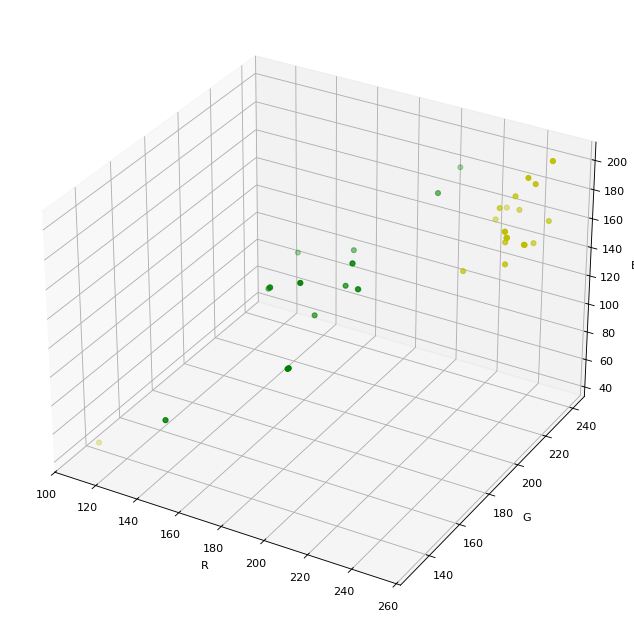

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B');

ax.scatter3D(lX['R'], lX['G'], lX['B'],color='y')
ax.scatter3D(mX['R'], mX['G'], mX['B'],color='g')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

le = preprocessing.LabelEncoder()
y=le.fit(y).transform(y)

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


[[191.58952649 189.28896336 163.06587088]
 [166.03120988 170.96171852 143.61999012]
 [216.19443616 224.07205166 198.71262792]
 [183.68464966 166.23780117 158.60121151]
 [183.69758646 166.24619744 158.61590342]
 [196.76813441 141.60847849 129.94942204]
 [197.13884006 180.72692446 164.11924238]
 [196.46963172 141.2987957  129.61652688]
 [199.0914881  173.71873016 156.21222222]
 [148.11437037 129.7312      84.09592099]
 [167.80424691 185.98696296 154.67926914]
 [148.11437037 129.7312      84.09592099]
 [201.32772733 178.40472797 150.46524048]
 [217.58591259 207.05540704 196.44030575]
 [201.57220483 178.40579232 150.47182577]
 [189.831434   166.85586815 138.57514245]
 [197.15950814 180.73369239 164.1026944 ]
 [168.28789925 166.92148022 147.61864373]
 [165.78528443 171.09423945 143.60087474]
 [165.81769965 171.05669204 143.59790727]
 [239.03005278 221.49526111 166.01841111]
 [238.35421235 229.3580642  183.05447901]
 [247.78895556 240.56542222 201.02937778]
 [227.15680079 211.09937407 143.47

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[6 0]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://anaconda.org/DistrictDataLabs/yellowbrick

Enter image path : /content/drive/MyDrive/collab  notebook/img_dataset/lemon sample.jfif
It is a lemon


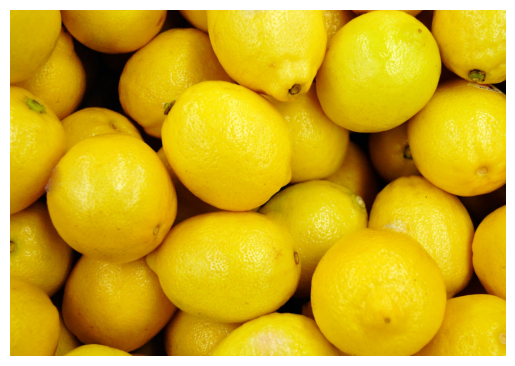

In [ ]:

import matplotlib.pyplot as plt

image=input("Enter image path : ")
im=cv2.imread(image)
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
features=np.mean(im, axis=(0, 1)).tolist()

yp=svclassifier.predict([features])
yp=le.inverse_transform(yp)

print('It is a '+yp[0])
plt.axis("off")
plt.imshow(im)
plt.show()